# Constant Opacity
| Author  | Stanley A. Baronett  |
|---------|----------------------|
| Created |  12/07/2023          |
| Updated |  04/06/2024          |

See [Desmos](https://www.desmos.com/) for interactive plots of 
- [$T = P/\rho$](https://www.desmos.com/calculator/ptyevuziu7)
- [$\rho_\mathrm{mid}$](https://www.desmos.com/calculator/ubtsqj1ltb)
- [$\rho(\theta)$](https://www.desmos.com/calculator/marlugmhhr)

In code units,
\begin{align*}
  T(r, \theta) &= \frac{P(r, \theta)}{\rho} = \frac{P_0}{\rho_0}\left(\frac{r\sin\theta}{r_0}\right)^{-1/2}, \\
  \rho_\mathrm{mid}(r) &= \frac{\rho_0\left(\frac{r + r_0}{r_0}\right)^{-9/4}}{1 + \exp\left[-\mathrm{e}^\mathrm{e}\left(\frac{r - r_0}{r_0}\right)\right]}, \\
  \rho(r, \theta) &= \rho_\mathrm{mid}\exp\left[\frac{GMr}{P}\left(\frac{1}{\sqrt{r^2\sin^2\theta + r^2\cos^2\theta}} - \frac{1}{r\sin\theta}\right)\right], \\
                  &= \rho_\mathrm{mid}\exp\left[\frac{GM}{P}\left(1 - \frac{1}{\sin\theta}\right)\right]. \\
\end{align*}

## Temperature Profiles

Reading amr_grid.inp
Reading wavelength_micron.inp
Reading dust_density.inp
Reading dust_temperature.dat


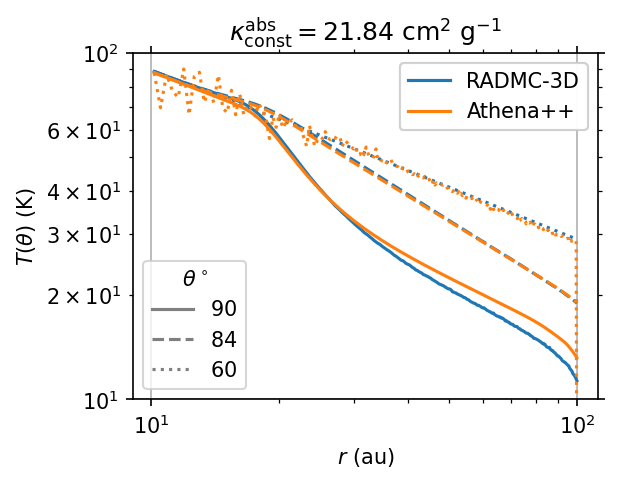

In [8]:
#===============================================================================
import matplotlib.pyplot as plt
import numpy as np
from radmc3dPy import *
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read

# Conversions
rad2deg          = 180/np.pi           # [deg]

# Set up plots
fig, ax = plt.subplots(figsize=(4, 3), dpi=150)
tab_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
# lss = ['solid', 'dashdot', 'dashed', 'dotted', (0, (1, 5))]
lss = ['solid', 'dashed', 'dotted']
theta_degs = [90, 84, 60]
c_solns, ls_thetas = [], []
ylim = (10, 100)

# Read and plot RADMC-3D solutions
data = analyze.readData(ddens=True, dtemp=True)
dtheta = (data.grid.yi[-1] - data.grid.yi[0])/data.grid.ny

for th, theta_deg in enumerate(theta_degs):
    j = int(theta_deg/rad2deg/dtheta)
    ax.plot(data.grid.x/natconst.au, data.dusttemp[:,j,0,0], 'tab:blue',
            ls=lss[th])
    ls_thetas.append(ax.plot([], [], color='tab:gray', ls=lss[th],
                     label=rf'${theta_deg}$')[0])

# Read and plot Athena++ solutions
base = '/home/stanley/github/sabaronett/rad-hydro/athena/dev/yanfeij'
problem_id = 'const_opac_raytrace'
# runs = ['128nx2', '256nx2', '512nx2', '1024nx2']
runs = ['1024nx2']

for i, run in enumerate(runs):
    path = f'{base}/{problem_id}/implicit/heat/{run}'
    athinput = athena_read.athinput(f'{path}/athinput.{problem_id}')
    dtheta = (athinput['mesh']['x2max'] - athinput['mesh']['x2min'])\
             /athinput['mesh']['nx2']
    L_0 = athinput['radiation']['length_unit']
    T_0 = athinput['radiation']['T_unit']
    athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.00001.athdf')
    T_field = athdf['press'][0]/athdf['rho'][0]*T_0

    for th, theta_deg in enumerate(theta_degs):
        j = int(theta_deg/rad2deg/dtheta)
        ax.plot(athdf['x1v']*L_0/natconst.au, T_field[j, :], 'tab:orange',
                ls=lss[th])

# Plot ghost points for colorless line style and add legends
c_solns.append(ax.plot([], [], color='tab:blue', label='RADMC-3D')[0])
c_solns.append(ax.plot([], [], color='tab:orange', label='Athena++')[0])
ls_legend = plt.legend(title=r'$\theta^\circ$', handles=ls_thetas,
                       loc='lower left')
color_legend = plt.legend(handles=c_solns, loc='upper right')
ax.add_artist(ls_legend)
ax.add_artist(color_legend)

# Format (sub)plots
ax.grid()
ax.minorticks_on()
ax.set(xscale='log', yscale='log', xlabel=r'$r$ (au)', ylabel=r'$T(\theta)$ (K)',
       title=r'$\kappa_\mathrm{const}^\mathrm{abs}=21.84$ cm$^2$ g$^{-1}$',
       ylim=ylim)
ax.tick_params(axis='both', which='both', top=True, right=True)